<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















# Ejecución del dataset

In [1]:
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')

Librerías adicionales

In [77]:
import warnings
import matplotlib.pyplot as plt

from scipy import stats
warnings.filterwarnings('ignore')

# Solución:

---

## Análisis de datos realizando clustering. Agrupamiento de k-means

---



In [78]:
# Identifica las columnas numéricas y categóricas
numerical_cols = ['bill_length_mm',	'bill_depth_mm','flipper_length_mm', 'body_mass_g']
categorical_cols = ['species', 'island', 'sex']

# Elimina las filas con valores nulos (NaN)
df = df.dropna()

## Primera aproximación a los datos de forma general y su limpieza:


**1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?**

Para saber cuantas veces se repite una especie en el dataframe, se puede usar el método ``value_counts()`` sobre la columna deseada, en este caso 'species'.

In [7]:
conteo_species = df[['species']].value_counts()
print(conteo_species)

species  
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


- **¿Que caracteristicas de los pinguinos se dan para cada especie?**

Considerando que los datos principales que se pueden cuantificar son las variables de Especie, Isla y Sexo, se obtiene un conteo específico de ellos usando la función ``.value_counts()``.

In [8]:
df.iloc[:, [0,1,6]].value_counts()

species    island     sex   
Gentoo     Biscoe     Male      61
                      Female    58
Chinstrap  Dream      Female    34
                      Male      34
Adelie     Dream      Male      28
                      Female    27
           Torgersen  Female    24
                      Male      23
           Biscoe     Male      22
                      Female    22
Name: count, dtype: int64

Tambien se puede obtener un promedio de sus características físicas como longitud del pico, profundidad del pico, longitud de la aleta y masa. Para ello, se procede a

In [9]:
cluster_summary = df.groupby('species')[numerical_cols].mean()
print(cluster_summary)

           bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                 
Adelie          38.823973      18.347260         190.102740  3706.164384
Chinstrap       48.833824      18.420588         195.823529  3733.088235
Gentoo          47.568067      14.996639         217.235294  5092.436975


**2. ¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.**

(La limpieza se realizó recién se cargaron los datos usando el comando ``df.dropna()``)

**3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?**

In [10]:
# Columnas relevantes
peng_island = df[["island", "sex"]]

# Cantidad de pingüinos por islas
grupo = peng_island.groupby("island").size()
print(grupo)

island
Biscoe       163
Dream        123
Torgersen     47
dtype: int64


- La isla con el mayor número de pingüinos es **Biscoe**, con un total de 163 pingüinos.


- Ahora, para determinar si hay un desbalance se debe analizar la distribución de los totales de pingüinos entre las tres islas. La isla con el mayor número de pingüinos (Biscoe) tiene 163, mientras que la isla con el menor número (Torgersen) tiene solo 47, esto me indica que hay un desbalance en el número de pingüinos por isla. La cantidad de pingüinos en Torgersen es considerablemente menor en comparación con Biscoe y Dream. Este desbalance es importante porque podría afectar los resultados de análisis posteriores, como el clustering, ya que una isla estará mucho más representada que las otras.

Analizando más a detalle, también podemos obtener detalle de cómo es la distribución de pingüinos por sexo en cada una de las islas, obteniendo así que el número de hembras y machos es bastante similar para el caso de las 3 islas.

sex        Female  Male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23


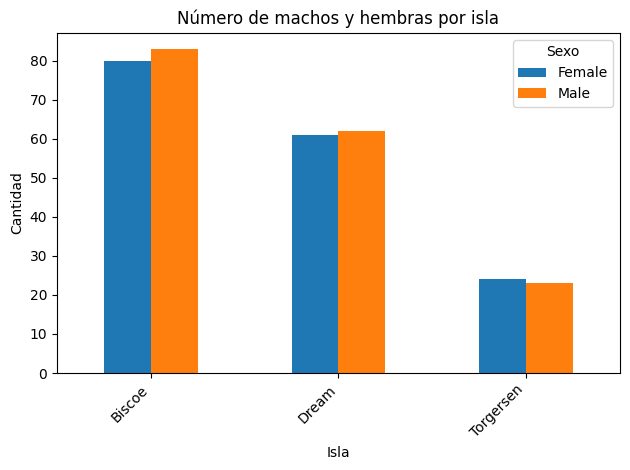

In [11]:
# Datos de sexo por islas
conteo_por_isla_sexo = df.groupby(['island', 'sex']).size().unstack(fill_value=0)
print(conteo_por_isla_sexo)

# Histograma
conteo_por_isla_sexo.plot.bar( rot=0)
plt.title('Número de machos y hembras por isla')
plt.xlabel('Isla')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

La extensión ``.unstack(fill_value=0)`` se usa para **pivotar** o reestructurar el **DataFrame multi-índice** de pandas. Su propósito es transformar filas en columnas, lo que hace que los datos sean más fáciles de leer y graficar.

**4. ¿Cuál es la especie con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por especie?**

In [12]:
# Columnas relevantes
peng_spec = df[["species", "sex"]]

# Cantidad de pingüinos por especies
grupo = peng_spec.groupby("species").size()
print(grupo)

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64


Sacando el número de pingüinos por especie considerando su sexo.

sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


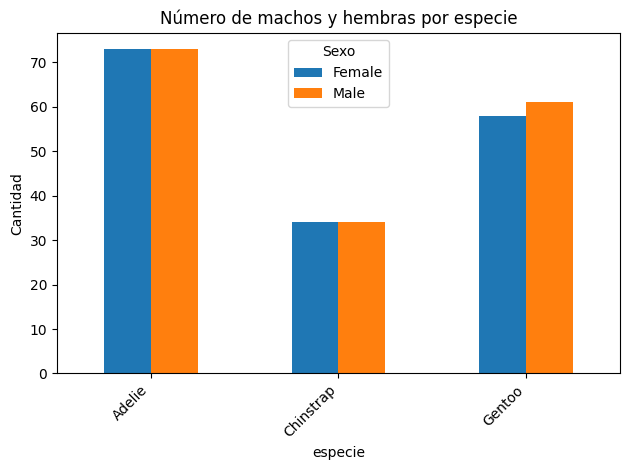

In [13]:
# Datos de sexo por especies
conteo_por_especie_sexo = df.groupby(['species', 'sex']).size().unstack(fill_value=0)
print(conteo_por_especie_sexo)

# Histograma
conteo_por_especie_sexo.plot.bar( rot=0)
plt.title('Número de machos y hembras por especie')
plt.xlabel('especie')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

- La especie  con el mayor número de pingüinos es Adelie, con un total de 118 pingüinos.

- Al igual que en el ítem anterior, note que si hay un desbalance en los datos puesto que la diferencia de pingüinos de las especies **Adelie** (146), **Gentoo** (118) con la especie **Chinstrap** (68) es bastante considerable. Esto también podría inducir posibles errores de clustering más adelante.

**5. ¿Cuál es la longitud media y la desviacion estandar del tamaño del pico de los pingüinos por especie?**

In [14]:
# Calculo del mean y std
estadisticas_pico = df.groupby('species')['bill_length_mm'].agg(['mean', 'std'])

print(estadisticas_pico)

                mean       std
species                       
Adelie     38.823973  2.662597
Chinstrap  48.833824  3.339256
Gentoo     47.568067  3.106116


**6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?**

In [15]:
 # Encuentra la fila (con idxmax) del pingüino con el pico más largo
peng_pico_largo = df.loc[df['bill_length_mm'].idxmax()]

# Obtiene la especie y la longitud del pico
especie = peng_pico_largo['species']
longitud_pico = peng_pico_largo['bill_length_mm']

print(f"El pingüino con el pico más largo (mm) es de la especie:")
peng_pico_largo[[0,2]]

El pingüino con el pico más largo (mm) es de la especie:


,253
species,Gentoo
bill_length_mm,59.6


**7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?**

                  mean         std  median
species                                   
Adelie     3706.164384  458.620135  3700.0
Chinstrap  3733.088235  384.335081  3700.0
Gentoo     5092.436975  501.476154  5050.0


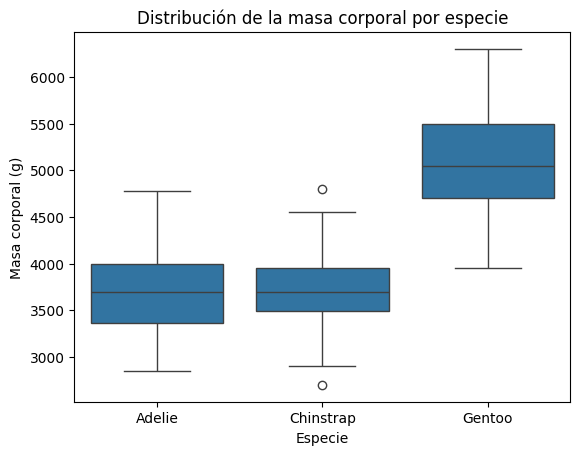

In [16]:
# Distribución de masa por especie
distribucion_masa = df.groupby('species')['body_mass_g'].agg(['mean', 'std', 'median'])
print(distribucion_masa)

# Gráfico
plt.figure()
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Distribución de la masa corporal por especie')
plt.xlabel('Especie')
plt.ylabel('Masa corporal (g)')
plt.show()

Se obtiene que la especie **Gentoo** tiene la masa corporal promedio más alta, mientras que las especies Adelie y Chinstrap son, en promedio, más ligeras.

**8. Describa la distribucion con ayuda de la media, desviacion estandar**

- **Media (mean):** La **media** de la masa corporal para las especies Adelie y Chinstrap es similar (alrededor de 3700 g). Sin embargo, la especie Gentoo tiene una media considerablemente más alta, alrededor de 5092 g, lo que indica que esta especie es significativamente más pesada (en promedio).

-  **Desviación estandar (std):** La desviación estándar de la masa corporal es similar para las tres especies, alrededor de 380 g a 500 g. Esto significa que la variabilidad en la masa corporal de los pingüinos dentro de cada especie es relativamente parecida, a pesar de las diferencias en sus medias. La especie Gentoo presenta una desviación estándar ligeramente mayor, lo que implica una dispersión un poco más amplia en sus datos de masa.

- **Mediana (median):** Al igual que con la media, las medianas de Adelie y Chinstrap (3700 g cada una) son casi idénticas, mientras que la mediana de Gentoo (5050 g) es notablemente superior. En este caso, la mediana y la media son muy similares para cada especie, lo que sugiere que la distribución de la masa no está fuertemente sesgada.

**9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre  machos y hembras?**

In [17]:
# Distribución de masa por especie
mass_std_sex = df.groupby('sex')['body_mass_g'].agg(['mean', 'std'])
print(mass_std_sex)

               mean         std
sex                            
Female  3862.272727  666.172050
Male    4545.684524  787.628884


In [18]:
mass_std_sex.iloc[1,1]

np.float64(787.6288841581749)

In [19]:
# Diferencia en masa corporal promedio
# macho - hembra
mean_diff = mass_std_sex.iloc[1,0] - mass_std_sex.iloc[0,0]

# Diferencia en desviación estandar
std_diff = mass_std_sex.iloc[1,1] - mass_std_sex.iloc[0,1]

print("La diferencia en masa corporal entre machos y hembras es:", round(mean_diff,2))
print("y la diferencia en desviación estándar es:", round(std_diff,2))

La diferencia en masa corporal entre machos y hembras es: 683.41
y la diferencia en desviación estándar es: 121.46


Analizando estos dos resultados, se puede afirmar que los **pingüinos machos** son aproximadamente **683 gramos más pesados** que las hembras. Y que la variabilidad de su masa corporal es también ligeramente mayor, con una **desviación estándar 45.57 g superior** a la de las hembras.

**10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?**

In [25]:
# Media y std de longitud aleta
estadisticas_aleta = df.groupby('species')['flipper_length_mm'].agg(['mean', 'std'])

print(estadisticas_aleta)

                 mean       std
species                        
Adelie     190.102740  6.521825
Chinstrap  195.823529  7.131894
Gentoo     217.235294  6.585431


- **Media:** Los pingüinos Gentoo tienen la longitud de aleta promedio más grande (217.23 mm), seguidos por Chinstrap y Adelie.

- **Desviación Estándar:** La dispersión de los datos es bastante similar entre las tres especies (entre 6.5 y 7.1 mm), lo que indica que las aletas de los pingüinos dentro de cada especie no varían mucho en longitud.

**11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?**

In [26]:
# Mínimo y máximo
min_max_aleta_por_especie = df.groupby('species')['flipper_length_mm'].agg(['min', 'max'])

print(min_max_aleta_por_especie)

             min    max
species                
Adelie     172.0  210.0
Chinstrap  178.0  212.0
Gentoo     203.0  231.0


Analizando los resultados, note lo siguiente para cada especie:

- **Gentoo:** Los pingüinos Gentoo tienen la aleta más larga. Su rango de longitud (de 203 mm a 231 mm) es significativamente más alto que el de las otras especies. El pingüino Gentoo con la aleta más corta (203 mm) sigue siendo más largo que casi todos los pingüinos Adelie y Chinstrap.

- **Adelie:** Los pingüinos Adelie tienen la aleta más corta. Su rango de longitud (de 172 mm a 207 mm) es el más bajo del grupo.

- **Chinstrap:** Los pingüinos Chinstrap están en el medio. Su rango de longitud (de 178 mm a 210 mm) se solapa con los de las otras dos especies. Esto sugiere que sus aletas son, en general, más largas que las de los Adelie, pero más cortas que las de los Gentoo.

**12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?**

In [28]:
# Variación longitud del pico entre especies e islas}
variacion_pico = df.groupby(['species', 'island'])['bill_length_mm'].mean()
print(variacion_pico)

species    island   
Adelie     Biscoe       38.975000
           Dream        38.520000
           Torgersen    39.038298
Chinstrap  Dream        48.833824
Gentoo     Biscoe       47.568067
Name: bill_length_mm, dtype: float64


Analizando los resultados considerandolos desde el punto de vista de las especies y de las islas por separado, se obtuvo que:

- **Especie:** Como se esperaba, la especie Chinstrap (48.83 mm) tiene el pico más largo, seguida por Gentoo (47.57 mm) y Adelie (38.84 mm, el promedio de sus tres islas). La diferencia entre especies es mucho más significativa que la variación dentro de una misma especie en diferentes islas.

- **Isla:** Las especies Chinstrap y Gentoo solo se encuentran en islas específicas, mientras que la Adelie está en las tres islas. Para la especie Adelie, la longitud del pico es muy similar en las tres islas, con un promedio general de alrededor de 38.84 mm, lo que sugiere que su hábitat no tiene un impacto significativo en la longitud de esta característica.

Resumiendo, la especie es el factor dominante que determina la longitud del pico, mientras que el efecto de la isla es menor o insignificante.

**13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?**

In [62]:
df.groupby(['species', 'island'])['bill_length_mm'].agg(['max', 'min'])

max   min
species   island               
Adelie    Biscoe     45.6  34.5
          Dream      44.1  32.1
          Torgersen  46.0  33.5
Chinstrap Dream      58.0  40.9
Gentoo    Biscoe     59.6  40.9

- La isla Dream tiene tanto la especie Adelie como Chinstrap. El pingüino Chinstrap más grande tiene un pico de 58.0 mm, y el pingüino Adelie más pequeño tiene un pico de 32.1 mm.

- En Biscoe cohabitan las especies Adelie y Gentoo. El pico del Gentoo más grande es de 59.6 mm, mientras que el del Adelie más pequeño es de 34.5 mm.

- En la Isla Torgersen solo se encuentra la especie Adelie, por lo tanto, no hay variación en la longitud del pico entre diferentes especies.

In [61]:
dif_long_aleta_por_isla = df.groupby(['island'])['bill_length_mm'].agg(['max', 'min'])
dif_long_aleta_por_isla['dif'] = dif_long_aleta_por_isla['max'] - dif_long_aleta_por_isla['min']

print(dif_long_aleta_por_isla)

            max   min   dif
island                     
Biscoe     59.6  34.5  25.1
Dream      58.0  32.1  25.9
Torgersen  46.0  33.5  12.5


La isla en la que hay mayor variación en la longitud del pico considerando las tres especies de pingüinos es **Dream Island** con una diferencia de 25.9mm, continúa la isla Biscoe (25.1mm) y finalmente la isla Torgersen (12.5mm)

**14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.**


- **Análisis general**

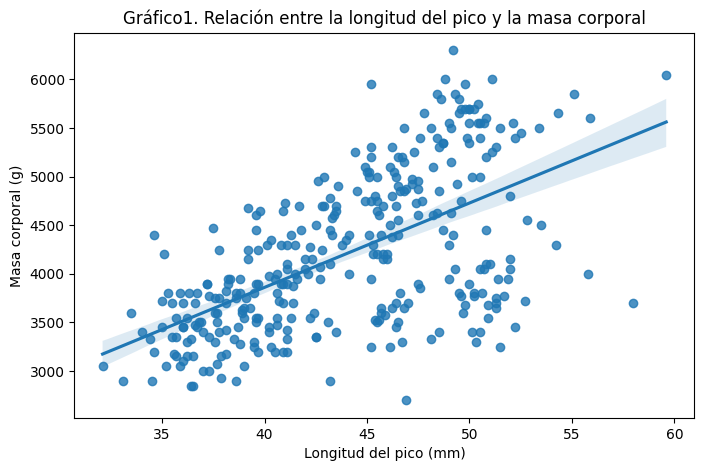

In [69]:
# Gráfico general (sin considerar la especie)
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='bill_length_mm', y='body_mass_g')
plt.title('Gráfico1. Relación entre la longitud del pico y la masa corporal')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()

Note que si se grafican todos los datos juntos, se puede observar una correlación positiva muy clara. El diagrama de dispersión muestra que los puntos se agrupan en una tendencia ascendente, lo que indica que los pingüinos con picos más largos también son los más pesados.

- **Análisis por especie**

Al separar los datos por especie, la relación se vuelve más compleja. El fuerte vínculo que se observaba en el análisis general se rompe, revelando que la relación es mucho más débil dentro de cada especie.

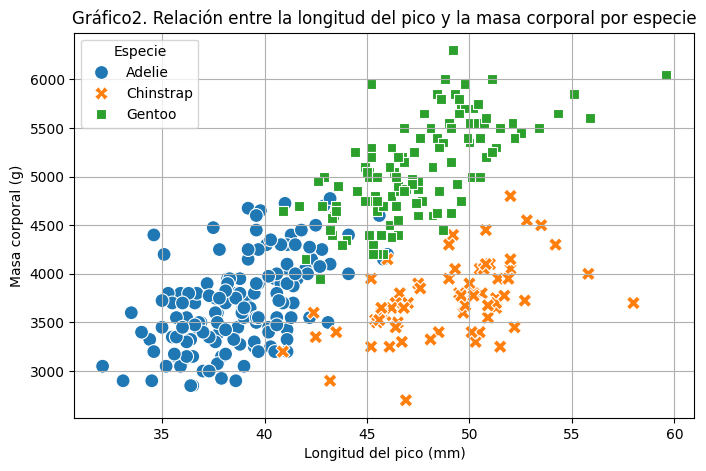

In [70]:
# Análisis por especie
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species', style='species', s=100)
plt.title('Gráfico2. Relación entre la longitud del pico y la masa corporal por especie')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend(title='Especie')
plt.grid(True)
plt.show()

Como se ve en el gráfico, los datos no forman una sola línea, sino tres grupos distintos, uno por cada especie:

- **Gentoo:** Forman un grupo en la parte superior derecha, lo que indica que son los más grandes y tienen los picos más largos.

- **Chinstrap:** Se ubican en el centro, con tamaños y picos intermedios.

- **Adelie:** Se agrupan en la parte inferior izquierda, siendo los más pequeños y con los picos más cortos.

La relación entre la longitud del pico y la masa corporal es principalmente un fenómeno entre especies. La correlación positiva general se debe a que los pingüinos Gentoo son, en promedio, más grandes y tienen picos más largos que los Chinstrap, que a su vez son más grandes que los Adelie.

Al analizar cada especie por separado, la relación es mucho más débil o incluso inexistente. La especie es la variable principal que explica la mayor parte de la variación.

**15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?**

Si se analizan todos los datos juntos en un solo gráfico, se puede observar una fuerte correlación positiva. Esto se debe a que, en general, los pingüinos más grandes (con mayor masa corporal) también tienen los picos más largos.

Sin embargo, este análisis puede ser engañoso. La fuerte correlación se produce porque el conjunto de datos incluye tres especies con rangos de tamaño muy diferentes. Al graficar los datos de cada especie con un color distinto, la verdadera relación se hace evidente.

La fuerte correlación del primer gráfico es, en realidad, el resultado de conectar estos tres grupos distintos. Dentro de cada grupo de especies, la relación entre la longitud del pico y la masa corporal es mucho más débil o incluso inexistente.

**16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?**

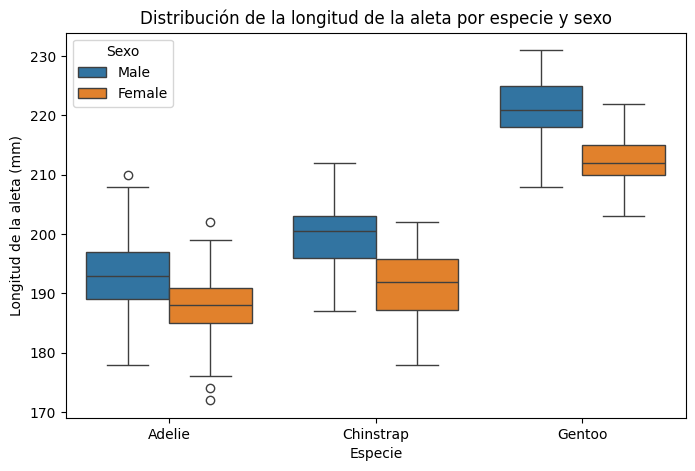

In [74]:
# Análisis por especie
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='species', y='flipper_length_mm', hue='sex')
plt.title('Distribución de la longitud de la aleta por especie y sexo')
plt.xlabel('Especie')
plt.ylabel('Longitud de la aleta (mm)')
plt.legend(title='Sexo')
plt.show()

Note que, independientemente de la especie que se esté analizando, la longitud de las aletas de los pingüinos machos resultará siendo mayor que la de las hembras.

Esta diferencia en tamaños se debe a  un fenómeno biológico llamado **dimorfismo sexual**, el cual se refiere a las diferencias en tamaño, forma o color entre los machos y las hembras de una misma especie. En el caso de los pingüinos, esta diferencia se manifiesta en el tamaño corporal, siendo los machos más grandes y pesados que las hembras. Las aletas más largas son una consecuencia directa de esta mayor envergadura física.

**TEST DE HIPÓTESIS**


**17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad.**


**Hipótesis del Test**


- Hipótesis Nula ($H_0$): No existe una correlación lineal significativa entre la longitud del pico y la masa corporal. Cualquier correlación observada es debida al azar.

- Hipótesis Alternativa ($H_a$): Existe una correlación lineal significativa entre la longitud del pico y la masa corporal. La correlación observada no es debida al azar.


Para esta prueba de hipótesis se usará  un nivel de significancia ($\alpha$) de 0.05, lo que significa que el 5% de probabilidad de que rechacemos la hipótesis nula cuando es verdadera.

In [75]:
# 1. Datos
df_lon_mass = df[['bill_length_mm', 'body_mass_g']]

# 2. Test de correlación
coef_correlacion, valor_p = stats.pearsonr(df_lon_mass['bill_length_mm'], df_lon_mass['body_mass_g'])

# 3. Nivel de significancia
alfa = 0.05

# 4. Resultados y conclusiones
print(f"Coeficiente de correlación (r): {coef_correlacion:.4f}")
print(f"Valor p: {valor_p:.4f}")
print("-" * 30)

if valor_p < alfa:
    print("El valor p es menor que 0.05.")
    print("Conclusión: La correlación es estadísticamente significativa.")
    print("Rechazamos la hipótesis nula. La relación no se debe al azar.")
else:
    print("El valor p es mayor que 0.05.")
    print("Conclusión: La correlación no es estadísticamente significativa.")
    print("No rechazamos la hipótesis nula. La relación podría deberse al azar.")

Coeficiente de correlación (r): 0.5895
Valor p: 0.0000
------------------------------
El valor p es menor que 0.05.
Conclusión: La correlación es estadísticamente significativa.
Rechazamos la hipótesis nula. La relación no se debe al azar.


In [79]:
valor_p

np.float64(1.538613514485931e-32)

Dado que el valor de $p$ es demasiado pequeño ($p \approx 1.54 \times 10^{-32}$), esto se toma como que es muy improbable que la correlación haya ocurrido por azar. Por lo tanto, se considera estadísticamente significativa y por eso se rechaza la idea de que no hay relación.

---

**En conclusión:**


El resultado del test de hipótesis indica que la correlación entre la longitud del pico y la masa corporal es estadísticamente significativa. La probabilidad de que esta relación haya ocurrido solo por azar es extremadamente baja (menor al 5%).

Sin embargo, esta fuerte correlación es impulsada en gran medida por la variación entre las especies. Los pingüinos Gentoo son más grandes y tienen picos más largos, mientras que los pingüinos Adelie son más pequeños y tienen picos más cortos. La correlación que observamos es principalmente un reflejo de estas diferencias de tamaño inter-específicas, no necesariamente una relación fuerte que se mantiene entre individuos de la misma especie.